---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-text-mining/resources/d9pwm) course resource._

---

*Note: Some of the cells in this notebook are computationally expensive. To reduce runtime, this notebook is using a subset of the data.*

# Case Study: Sentiment Analysis

### Data Prep

In [44]:
bb_chars={} 
Walter=''
Skyler=''
Jesse=''
Hank=''
Marie=''
Heisenberg=''
with open("breaking_bad_transcripts/season_all/merged.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        if line.startswith('Walter:'):
            Walter=Walter+' '+(line[8:])
        elif line.startswith('Skyler:'):
            Skyler=Skyler+' '+(line[8:])
        elif line.startswith('Jesse:'):
            Jesse=Jesse+' '+(line[7:])
        elif line.startswith('Hank:'):
            Hank=Hank+' '+(line[6:])
        if line.startswith('Marie:'):
            Marie=Marie+' '+(line[7:])
       
bb_chars['Walter']=Walter
bb_chars['Skyler']=Skyler
bb_chars['Jesse']=Jesse
bb_chars['Hank']=Hank
bb_chars['Marie']=Marie


In [45]:

import pandas as pd
df1 = pd.DataFrame([x for x in bb_chars['Walter'].split('\n')])

df2 = pd.DataFrame([x for x in bb_chars['Skyler'].split('\n')])

df3 = pd.DataFrame([x for x in bb_chars['Jesse'].split('\n')])
df4 = pd.DataFrame([x for x in bb_chars['Hank'].split('\n')])

df5 = pd.DataFrame([x for x in bb_chars['Marie'].split('\n')])


In [46]:
pd.options.display.max_colwidth = 100

In [47]:
df1.head()

,0
0,How does it feel to be a smart ass?
1,"I was curious. Honestly, I never expected you to amount to much, but methamphetamine? I didn't ..."
2,"""Cap'n Cook?"" That's not you? Like I said, no one is looking for you."
3,Not really.
4,Short speech. You lost your partner today. What's his name – Emilio? Emilio is going to prison....


In [48]:
listOfCharacters1 = [False] *df1.shape[0]
listOfCharacters2 = [False] *df2.shape[0]
listOfCharacters3 = [False] *df3.shape[0]
listOfCharacters4 = [False] *df4.shape[0]
listOfCharacters5 = [True] *df5.shape[0]


In [49]:
df1['Marie'] = listOfCharacters1
df2['Marie'] = listOfCharacters2 
df3['Marie'] = listOfCharacters3
df4['Marie'] = listOfCharacters4
df5['Marie'] = listOfCharacters5


In [50]:
df1=df1.rename(columns={0: 'Dialogue'})
df2=df2.rename(columns={0: 'Dialogue'})
df3=df3.rename(columns={0: 'Dialogue'})
df4=df4.rename(columns={0: 'Dialogue'})
df5=df5.rename(columns={0: 'Dialogue'})


In [51]:
df = pd.concat([df1, df2,df3,df4,df5])
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,Dialogue,Marie
0,"Jesse, I am not working you.",False
1,Fuck you.,False
2,"How did you come up with that? I mean, where did you possibly...?",False
3,"I see. So you involve Ted. Ah, well, that'll be fun, bringing the police up to speed on all of ...",False
4,"I learned from the best. Somehow, something tells me Hank is here because of you. And I'm not f...",False


In [52]:
df.head(10)

,Dialogue,Marie
0,"Jesse, I am not working you.",False
1,Fuck you.,False
2,"How did you come up with that? I mean, where did you possibly...?",False
3,"I see. So you involve Ted. Ah, well, that'll be fun, bringing the police up to speed on all of ...",False
4,"I learned from the best. Somehow, something tells me Hank is here because of you. And I'm not f...",False
5,"No, listen, I know it sounds risky, but it wouldn't be anything that would get him into real tr...",False
6,"[laughs weakly] Something... something scientific, right...",False
7,This cost me my family.,False
8,"That's awesome! Serious? That's...that's...that's great, man! My aunt, she never...I mean, y'kn...",False
9,What? You did what?,False


In [53]:
from io import StringIO
col = [ 'Dialogue','Marie']
df = df[col]
df = df[pd.notnull(df['Dialogue'])]
df.columns = ['Dialogue', 'Marie']
category_id_df = df[['Dialogue', 'Marie']]
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Marie', 'Dialogue']].values)
df.head(10)


,Dialogue,Marie
0,"Jesse, I am not working you.",False
1,Fuck you.,False
2,"How did you come up with that? I mean, where did you possibly...?",False
3,"I see. So you involve Ted. Ah, well, that'll be fun, bringing the police up to speed on all of ...",False
4,"I learned from the best. Somehow, something tells me Hank is here because of you. And I'm not f...",False
5,"No, listen, I know it sounds risky, but it wouldn't be anything that would get him into real tr...",False
6,"[laughs weakly] Something... something scientific, right...",False
7,This cost me my family.,False
8,"That's awesome! Serious? That's...that's...that's great, man! My aunt, she never...I mean, y'kn...",False
9,What? You did what?,False


In [54]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


In [55]:
import re
from nltk.corpus import stopwords


df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['Dialogue'] = df['Dialogue'].apply(clean_text)
df['Dialogue'] = df['Dialogue'].str.replace('\d+', '')
df.head()

,Dialogue,Marie
0,jesse working,False
1,fuck,False
2,come mean possibly,False
3,see involve ted ah well thatll fun bringing police speed much telling siteenyearold son father w...,False
4,learned best somehow something tells hank im forgetting,False


In [56]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


In [57]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 120
# This is fixed.
EMBEDDING_DIM = 64
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df1['Dialogue'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_index

Found 2416 unique tokens.


{'you': 1,
 'i': 2,
 'to': 3,
 'the': 4,
 'and': 5,
 'a': 6,
 'that': 7,
 'it': 8,
 'me': 9,
 'of': 10,
 'what': 11,
 'this': 12,
 'is': 13,
 'my': 14,
 'in': 15,
 'no': 16,
 'do': 17,
 'just': 18,
 'for': 19,
 'he': 20,
 'not': 21,
 'have': 22,
 'know': 23,
 'your': 24,
 "i'm": 25,
 'was': 26,
 'but': 27,
 'we': 28,
 'all': 29,
 'be': 30,
 "it's": 31,
 'so': 32,
 'on': 33,
 'are': 34,
 'with': 35,
 "don't": 36,
 'now': 37,
 'right': 38,
 'him': 39,
 'about': 40,
 'how': 41,
 'jesse': 42,
 'up': 43,
 'out': 44,
 'if': 45,
 '–': 46,
 'would': 47,
 'think': 48,
 'mean': 49,
 'as': 50,
 "you're": 51,
 'got': 52,
 'want': 53,
 'skyler': 54,
 'who': 55,
 "that's": 56,
 'get': 57,
 'one': 58,
 'like': 59,
 'can': 60,
 'money': 61,
 'his': 62,
 'at': 63,
 'did': 64,
 'will': 65,
 'there': 66,
 'here': 67,
 'am': 68,
 'need': 69,
 'going': 70,
 'gus': 71,
 'hank': 72,
 'why': 73,
 'when': 74,
 'they': 75,
 'could': 76,
 'or': 77,
 'go': 78,
 'good': 79,
 'then': 80,
 'some': 81,
 'nothing': 82

In [58]:
X = tokenizer.texts_to_sequences(df['Dialogue'].values)#df['Dialogue']#tokenizer.texts_to_sequences(df['Dialogue'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
X

Shape of data tensor: (1558, 120)


array([[   0,    0,    0, ...,    0,   42,  672],
       [   0,    0,    0, ...,    0,    0, 1313],
       [   0,    0,    0, ...,  147,   49,  643],
       ...,
       [   0,    0,    0, ...,  870,  133,  112],
       [   0,    0,    0, ...,    0,  107,   38],
       [   0,    0,    0, ...,    0,    0,  178]], dtype=int32)

In [59]:
Y = pd.get_dummies(df['Marie']).values#df['category_id']
#print('Shape of label tensor:', Y.shape)
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1043, 120) (1043, 2)
(515, 120) (515, 2)


In [61]:
X_test


array([[   0,    0,    0, ...,    0,    0,  217],
       [   0,    0,    0, ...,  487,  309, 1791],
       [   0,    0,    0, ...,    0,    0,  546],
       ...,
       [   0,    0,    0, ...,  475,   38, 1344],
       [   0,    0,    0, ...,    0,  928,  541],
       [   0,    0,    0, ...,    0,   83,   97]], dtype=int32)

In [62]:
Y_test


array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [63]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [64]:
X.shape[1]

120

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model1.add(tf.keras.layers.SpatialDropout1D(0.2))
model1.add(tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model1.add(tf.keras.layers.Dense(2, activation='softmax'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model1.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 938 samples, validate on 105 samples
Epoch 1/10
938/938 [==============================] - 2s 2ms/sample - loss: 0.5394 - accuracy: 0.8699 - val_loss: 0.1964 - val_accuracy: 0.9524
Epoch 2/10
938/938 [==============================] - 1s 1ms/sample - loss: 0.1677 - accuracy: 0.9701 - val_loss: 0.2421 - val_accuracy: 0.9524
Epoch 3/10
938/938 [==============================] - 1s 1ms/sample - loss: 0.1381 - accuracy: 0.9701 - val_loss: 0.1945 - val_accuracy: 0.9524
Epoch 4/10
938/938 [==============================] - 1s 1ms/sample - loss: 0.1354 - accuracy: 0.9701 - val_loss: 0.1937 - val_accuracy: 0.9524
Epoch 5/10
938/938 [==============================] - 1s 1ms/sample - loss: 0.1336 - accuracy: 0.9701 - val_loss: 0.1987 - val_accuracy: 0.9524
Epoch 6/10
938/938 [==============================] - 1s 1ms/sample - loss: 0.1343 - accuracy: 0.9701 - val_loss: 0.1971 - val_accuracy: 0.9524
Epoch 7/10
938/938 [==============================] - 1s 1ms/sample - loss: 0.1320 - accur

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

In [66]:
accr = model1.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

515/515 [==============================] - 1s 2ms/sample - loss: 0.0971 - accuracy: 0.9806
Test set
  Loss: 0.097
  Accuracy: 0.981


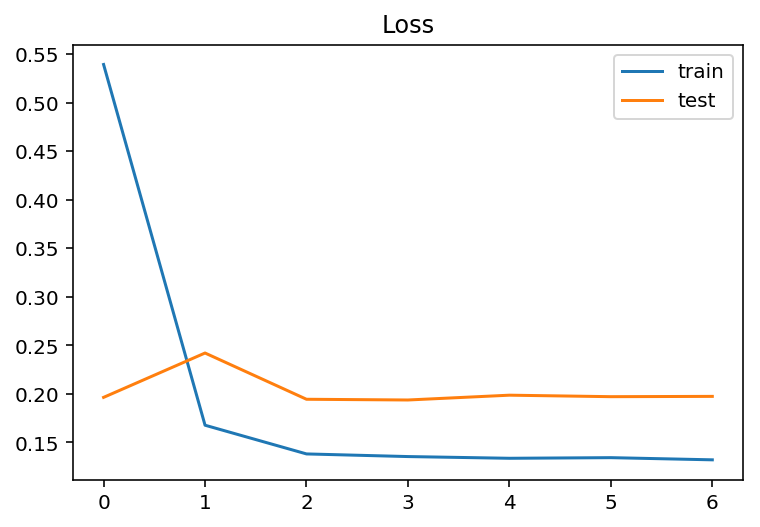

In [67]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [68]:
#model = LinearSVC()
#X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
#"model.fit(X_train, y_train)
# X_test = X_test.reshape(X_test.shape[1:])
# X_test=X_test.transpose()
y_pred = model1.predict(X_test)
y_pred



array([[0.97397524, 0.02602482],
       [0.9698308 , 0.0301692 ],
       [0.97288847, 0.02711155],
       ...,
       [0.969963  , 0.03003692],
       [0.9741494 , 0.02585056],
       [0.973305  , 0.02669499]], dtype=float32)

In [69]:
Y_test


array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [70]:
import numpy as np
probas = np.array(y_pred)
y_pred = np.argmax(probas, axis=-1)    
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [71]:
Y_test = np.array(Y_test)
Y_test = np.argmax(Y_test, axis=-1)    
print(Y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Y_test, y_pred)



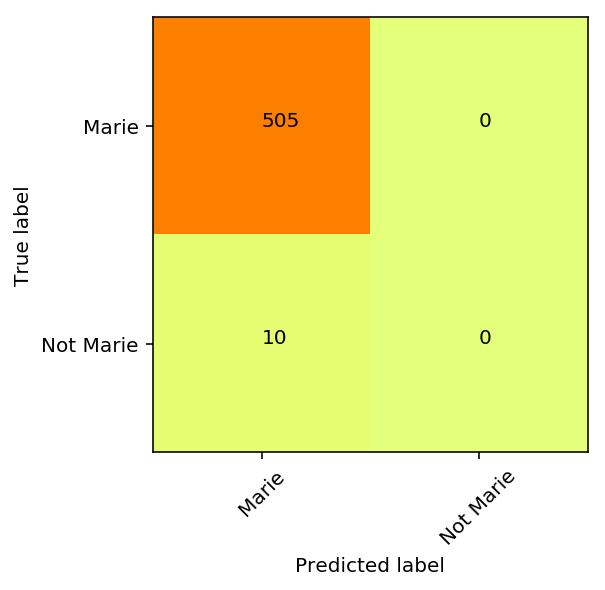

In [73]:
plt.clf()
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Marie','Not Marie']
#plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(conf_mat[i][j]))
plt.show()

In [74]:
from sklearn.metrics import classification_report
y_true = Y_test
target_names = ['Marie', 'Not Marie']
print(classification_report(y_true, y_pred, target_names=target_names))
     ####----end here---##

              precision    recall  f1-score   support

       Marie       0.98      1.00      0.99       505
   Not Marie       0.00      0.00      0.00        10

    accuracy                           0.98       515
   macro avg       0.49      0.50      0.50       515
weighted avg       0.96      0.98      0.97       515



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [190]:
Y_train = np.array(Y_train)
Y_train = np.argmax(Y_train, axis=-1)    
print(Y_train)

[0 0 0 ... 0 0 0]


In [191]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
#print(clf.predict(X[2:3]))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [192]:
y_pred1=clf.predict(X_test)

In [194]:
Y_test = np.array(Y_test)
Y_test = np.argmax(Y_test, axis=-1)    
print(Y_test)

[0 1 0 ... 0 0 0]


In [195]:
from sklearn.metrics import classification_report
y_true = Y_test
target_names = ['Chandler', 'Not Chandler']
print(classification_report(y_true, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

    Chandler       0.84      1.00      0.91     27460
Not Chandler       0.25      0.00      0.00      5287

    accuracy                           0.84     32747
   macro avg       0.54      0.50      0.46     32747
weighted avg       0.74      0.84      0.77     32747

